In [1]:
rm(list = ls())
gc()

setwd("/mnt/data00/minghui/project_NMF/04_Test_NMF_Program_0120/")
library(Seurat)
library(dplyr)
library(cowplot)
library(harmony)
library(readr) 
library(tidyr)
library(gplots)
library(reshape2)
library(paletteer)
library(AUCell)
library(pheatmap)
suppressPackageStartupMessages(library(NMF))
suppressMessages(library(ggplot2))
suppressMessages(library(tidyverse))
suppressMessages(library(scibet))
suppressMessages(library(viridis))
suppressMessages(library(ggsci))
 
d_palettes<- palettes_d_names
mycol<-paletteer_d( "ggsci::default_igv",n=51)

source('/mnt/data00/minghui/Fuctions/Markers_kno.R')
source('/mnt/data00/minghui/Fuctions/seurat_functions.R')

library(ComplexHeatmap)
library(circlize)

library(scater)


library(htmlwidgets)

library(GSVA)
library(ggplot2)
library(ggsignif)
library(ggbeeswarm)



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,652777,34.9,1445934,77.3,1178160,63.0
Vcells,1213617,9.3,8388608,64.0,1924993,14.7


Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Rcpp


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




Error in library(MSigDB) : there is no package called ‘MSigDB’
Error in library(biomaRt) : there is no package called ‘biomaRt’
Error in library(visNetwork) : there is no package called ‘visNetwork’
Error in library(rjags) : there is no package called ‘rjags’
Error in library(infercnv) : there is no package called ‘infercnv’
Error in library(mHG) : there is no package called ‘mHG’
Error in library(VennDiagram) : there is no package called ‘VennDiagram’
Error in library(tsne) : there is no package called ‘tsne’
Error in library(nichenetr) : there is no package called ‘nichenetr’
Error in library(DiagrammeR) : there is no package called ‘DiagrammeR’
Error in library(SeuratDisk) : there is no package called ‘SeuratDisk’
Error in library(SeuratWrappers) : 
  there is no package called ‘SeuratWrappers’
Error in library(nnls) : there is no package called ‘nnls’
Error in library(colormap) : there is no package called ‘colormap’
Error in library(genesorteR) : there is no package called ‘geneso

Loading required package: SingleCellExperiment

Loading required package: scuttle


Attaching package: ‘htmlwidgets’


The following object is masked from ‘package:SeuratObject’:

    JS


The following object is masked from ‘package:Seurat’:

    JS




In [2]:
cluster_cols <- c(
  "#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72",
  "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", "#E78AC3",
  "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D",
  "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999",
  "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000",
  "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")


my36colors <- c('#53A85F', '#F1BB72', '#D6E7A3', '#57C3F3', '#476D87', '#E95C59', '#E59CC4', '#AB3282', '#23452F', '#BD956A', '#8C549C', '#585658', '#9FA3A8', '#5F3D69', '#C5DEBA', '#58A4C3', '#E4C755', '#F7F398', '#AA9A59', '#E63863', '#E39A35', '#C1E6F3', '#6778AE', '#91D0BE', '#B53E2B', '#712820', '#DCC1DD', '#CCE0F5', '#CCC9E6', '#625D9E', '#68A180', '#3A6963', '#968175', '#E5D2DD', '#E0D4CA', '#F3B1A0' )

col.list <- list(Tissuetype = c('BE-IM' = my36colors[1], 
                              'BSCJ' = my36colors[2], 
                              'CAG' = my36colors[3],
                              'CIM' = my36colors[4],
                              'Colon' = my36colors[5],
                              'E-GM' = my36colors[6],
                              'GIM' = my36colors[7],
                              'Ileum' = my36colors[8],
                              'NAG' = my36colors[9],
                              'ND' = my36colors[10],
                              'NGB' = my36colors[11],
                              'NGC' = my36colors[12],
                              'NSCJ' = my36colors[13],
                              'Rectum' = my36colors[14]
))

In [3]:
AllTissue_merge <- readRDS('./01_AllTissue_merge.rds')

filtered_modules_list <- readRDS('01_filtered_modules_list.rds')

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



  min    1%    5%   10%   50%  100% 
   61   281   374   477  1582 10002 


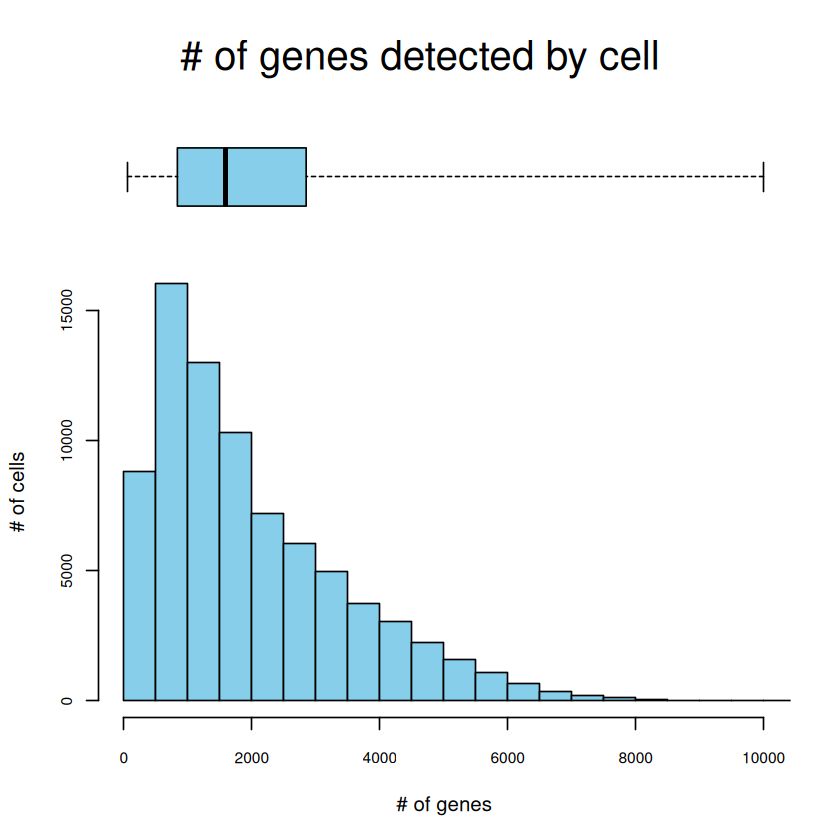

In [4]:
DefaultAssay(AllTissue_merge) <- 'RNA'

cells_rankings <- AUCell_buildRankings(AllTissue_merge@assays$RNA@data,splitByBlocks=TRUE) 

cells_AUC <- AUCell_calcAUC(filtered_modules_list, cells_rankings, 
                            aucMaxRank=nrow(cells_rankings)*0.1)


moduleScore <- getAUC(cells_AUC)

In [5]:
 names(filtered_modules_list)

[1] "BE_modules1"                "BE_modules3"               
 [3] "BE_modules4"                "BE_modules5"               
 [5] "BE_modules6"                "BE_modules7"               
 [7] "BE_modules8"                "BE_modules10"              
 [9] "BE_modules11"               "BE_modules12"              
[11] "BE_modules14"               "BE_modules15"              
[13] "BE_modules16"               "BE_modules17"              
[15] "BE_modules18"               "BE_modules19"              
[17] "BE_modules21"               "Healthy_intestine_modules1"
[19] "Healthy_intestine_modules2" "Healthy_intestine_modules3"
[21] "Healthy_intestine_modules4" "Healthy_intestine_modules5"
[23] "Healthy_intestine_modules6" "Healthy_intestine_modules7"
[25] "Healthy_intestine_modules8" "Healthy_stomach_modules1"  
[27] "Healthy_stomach_modules3"   "Healthy_stomach_modules4"  
[29] "Healthy_stomach_modules5"   "Healthy_stomach_modules6"  
[31] "Healthy_stomach_modules7"   "Healthy_stomach_modules8"  
[33] "Healthy_stomach_modules9"   "Healthy_stomach_modules10" 
[35] "Healthy_stomach_modules11"  "Healthy_stomach_modules12" 
[37] "Healthy_stomach_modules13"  "Healthy_stomach_modules15" 
[39] "Healthy_stomach_modules16"  "Healthy_stomach_modules17" 
[41] "Healthy_stomach_modules18"  "Healthy_stomach_modules19" 
[43] "Healthy_stomach_modules20"  "Healthy_stomach_modules21" 
[45] "Healthy_stomach_modules22"

In [6]:
for (geneSet in names(filtered_modules_list)) {

    AUCell_auc <- as.numeric(getAUC(cells_AUC)[geneSet, ])
  

    AllTissue_merge@meta.data[, geneSet] <- AUCell_auc
}


print(head(AllTissue_merge@meta.data))


                                  Sample Tissue_in_paper Batch Sample_Barcode
SRR8513799-CTCACACGTCACCCAG-1 SRR8513799          Rectum    NA             NA
SRR8513799-TACAGTGGTCATCCCT-1 SRR8513799          Rectum    NA             NA
SRR8513799-GCACATACACTGTCGG-1 SRR8513799          Rectum    NA             NA
SRR8513799-CTGAAACTCTGGCGAC-1 SRR8513799          Rectum    NA             NA
SRR8513799-AGTAGTCAGTGAAGAG-1 SRR8513799          Rectum    NA             NA
SRR8513799-ATCCGAACAACGATGG-1 SRR8513799          Rectum    NA             NA
                                sum detected             Study Patient_type
SRR8513799-CTCACACGTCACCCAG-1  7574     1650 Wang et. al. 2020      Healthy
SRR8513799-TACAGTGGTCATCCCT-1 19882     3503 Wang et. al. 2020      Healthy
SRR8513799-GCACATACACTGTCGG-1 28166     4566 Wang et. al. 2020      Healthy
SRR8513799-CTGAAACTCTGGCGAC-1 21380     3693 Wang et. al. 2020      Healthy
SRR8513799-AGTAGTCAGTGAAGAG-1  6762     1483 Wang et. al. 2020      Health

In [7]:
GeomSplitViolin <- ggproto("GeomSplitViolin", GeomViolin, 
                           draw_group = function(self, data, ..., draw_quantiles = NULL) {
  data <- transform(data, xminv = x - violinwidth * (x - xmin), xmaxv = x + violinwidth * (xmax - x))
  grp <- data[1, "group"]
  newdata <- plyr::arrange(transform(data, x = if (grp %% 2 == 1) xminv else xmaxv), if (grp %% 2 == 1) y else -y)
  newdata <- rbind(newdata[1, ], newdata, newdata[nrow(newdata), ], newdata[1, ])
  newdata[c(1, nrow(newdata) - 1, nrow(newdata)), "x"] <- round(newdata[1, "x"])

  if (length(draw_quantiles) > 0 & !scales::zero_range(range(data$y))) {
    stopifnot(all(draw_quantiles >= 0), all(draw_quantiles <=
      1))
    quantiles <- ggplot2:::create_quantile_segment_frame(data, draw_quantiles)
    aesthetics <- data[rep(1, nrow(quantiles)), setdiff(names(data), c("x", "y")), drop = FALSE]
    aesthetics$alpha <- rep(1, nrow(quantiles))
    both <- cbind(quantiles, aesthetics)
    quantile_grob <- GeomPath$draw_panel(both, ...)
    ggplot2:::ggname("geom_split_violin", grid::grobTree(GeomPolygon$draw_panel(newdata, ...), quantile_grob))
  }
  else {
    ggplot2:::ggname("geom_split_violin", GeomPolygon$draw_panel(newdata, ...))
  }
})

geom_split_violin <- function(mapping = NULL, data = NULL, stat = "ydensity", position = "identity", ..., 
                              draw_quantiles = NULL, trim = TRUE, scale = "area", na.rm = FALSE, 
                              show.legend = NA, inherit.aes = TRUE) {
  layer(data = data, mapping = mapping, stat = stat, geom = GeomSplitViolin, 
        position = position, show.legend = show.legend, inherit.aes = inherit.aes, 
        params = list(trim = trim, scale = scale, draw_quantiles = draw_quantiles, na.rm = na.rm, ...))
}

In [8]:
names(filtered_modules_list)[1]

[1] "BE_modules1"

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FA

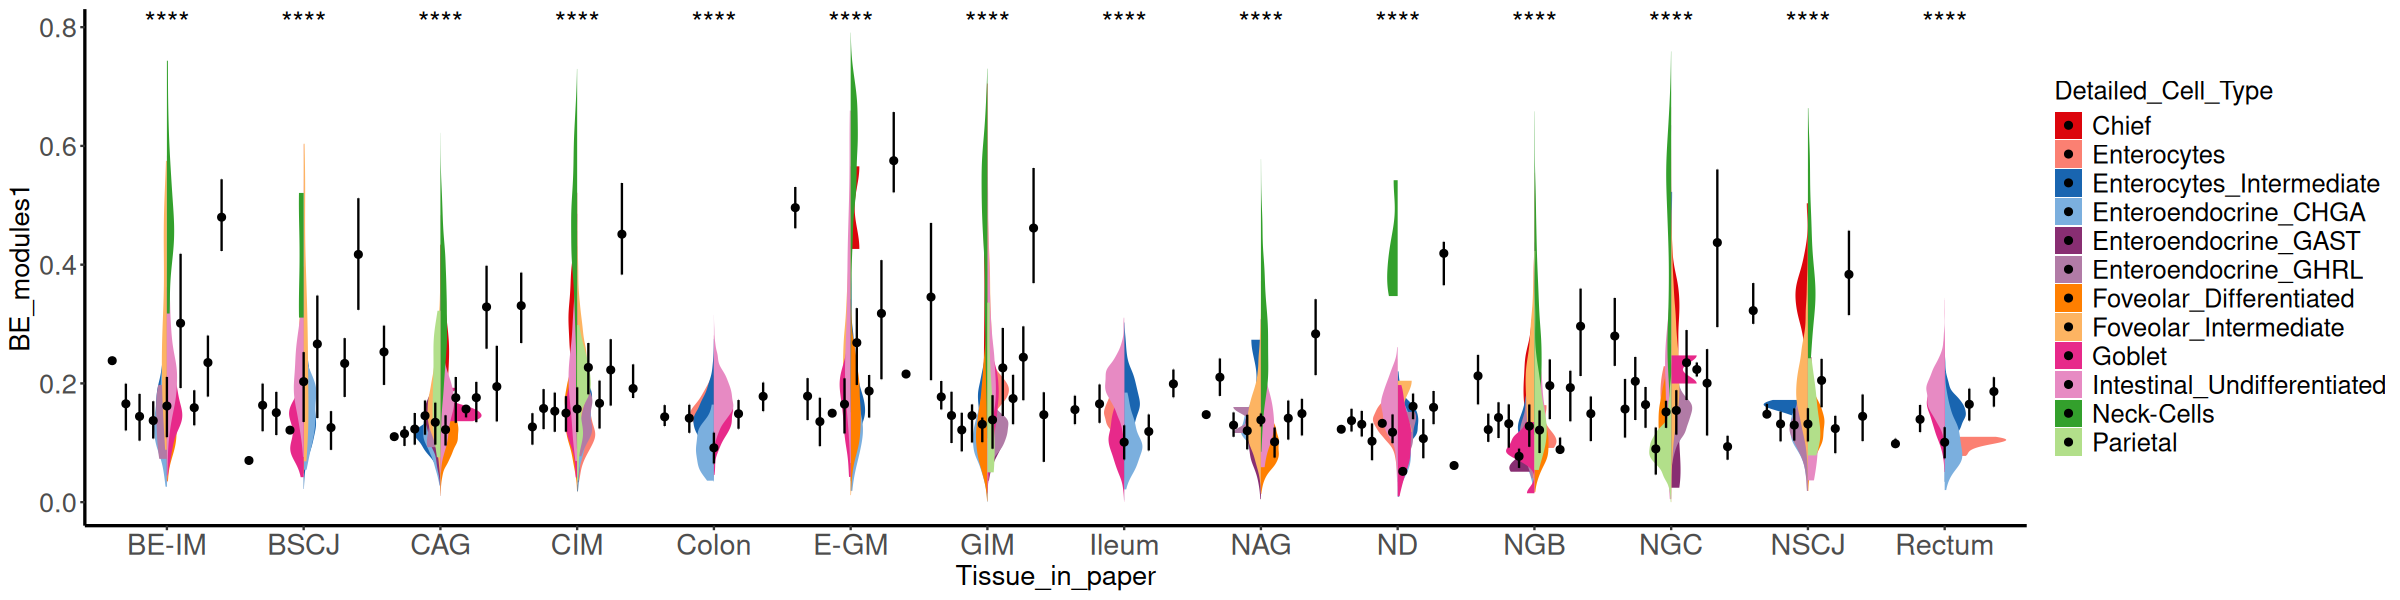

In [9]:

options(repr.plot.height = 5, repr.plot.width = 20)

vplot1 <- ggplot(AllTissue_merge@meta.data, aes_string(x = 'Tissue_in_paper', y = names(filtered_modules_list)[1], fill = 'Detailed_Cell_Type')) +
#   ggtitle(names(filtered_modules_list)[1]) + 
  geom_split_violin(trim = TRUE, colour = NA) +
  geom_point(stat = 'summary', fun = mean, position = position_dodge(width = 0.9)) +
  stat_summary(fun.min = function(x) { quantile(x)[2] },
               fun.max = function(x) { quantile(x)[4] },
               geom = 'errorbar', color = 'black', width = 0.01, size = 0.5,
               position = position_dodge(width = 0.9)) +
  theme_bw() +
  theme(axis.text.x = element_text(size = 17),  
        axis.text.y = element_text(size = 16), 
        axis.title = element_text(size = 16), 
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 15),
        axis.line = element_line(size = 0.7), 
        panel.border = element_blank(),
        panel.grid = element_blank()) +
  scale_fill_manual(values = cluster_cols) +
  stat_compare_means(aes(group = Detailed_Cell_Type), data = AllTissue_merge@meta.data, label = "p.signif", label.x = 1.5, size = 6)  # 增大检验标签的大小

print(vplot1)


In [10]:
plot_list <- list()

for (i in seq_along(filtered_modules_list)) {
  module_name <- names(filtered_modules_list)[i]
  plot <- ggplot(AllTissue_merge@meta.data, aes_string(x = 'Tissue_in_paper', y = module_name, fill = 'Detailed_Cell_Type')) +
    ggtitle(module_name) + 
    geom_split_violin(trim = TRUE, colour = NA) +
    geom_point(stat = 'summary', fun = mean, position = position_dodge(width = 0.9)) +
    stat_summary(fun.min = function(x) { quantile(x)[2] },
                 fun.max = function(x) { quantile(x)[4] },
                 geom = 'errorbar', color = 'black', width = 0.01, size = 0.5,
                 position = position_dodge(width = 0.9)) +
    theme_bw() +
    theme(axis.text.x = element_text(size = 17),  
          axis.text.y = element_text(size = 16), 
          axis.title = element_text(size = 16), 
          legend.text = element_text(size = 15),
          legend.title = element_text(size = 15),
          axis.line = element_line(size = 0.7), 
          panel.border = element_blank(),
          panel.grid = element_blank()) +
    scale_fill_manual(values = cluster_cols) +
    stat_compare_means(aes(group = Detailed_Cell_Type), data = AllTissue_merge@meta.data, label = "p.signif", label.x = 1.5, size = 6)
  
  plot_list[[i]] <- plot
}

In [11]:
library(gridExtra)



Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine


The following object is masked from ‘package:dplyr’:

    combine




In [12]:
plot_list <- list()

for (i in seq_along(filtered_modules_list)) {
  module_name <- names(filtered_modules_list)[i]
  plot <- ggplot(AllTissue_merge@meta.data, aes_string(x = 'Tissue_in_paper', y = module_name, fill = 'Detailed_Cell_Type')) +
    ggtitle(module_name) + 
    geom_split_violin(trim = TRUE, colour = NA) +
    geom_point(stat = 'summary', fun = mean, position = position_dodge(width = 0.9)) +
    stat_summary(fun.min = function(x) { quantile(x)[2] },
                 fun.max = function(x) { quantile(x)[4] },
                 geom = 'errorbar', color = 'black', width = 0.01, size = 0.5,
                 position = position_dodge(width = 0.9)) +
    theme_bw() +
    theme(axis.text.x = element_text(size = 17),  
          axis.text.y = element_text(size = 16), 
          axis.title = element_text(size = 16), 
          legend.text = element_text(size = 15),
          legend.title = element_text(size = 15),
          axis.line = element_line(size = 0.7), 
          panel.border = element_blank(),
          panel.grid = element_blank(),
          legend.position = "none") +  # This line removes the legend
    scale_fill_manual(values = cluster_cols) +
    stat_compare_means(aes(group = Detailed_Cell_Type), data = AllTissue_merge@meta.data, label = "p.signif", label.x = 1.5, size = 6)
  
  plot_list[[i]] <- plot
}


In [13]:
length(plot_list)

[1] 45

In [14]:
do.call(grid.arrange, c(plot_list, ncol=5))

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop